# Erzwungene Drehschwingung

Sie müssen die Code- und Markupzeilen immer mit `Strg + Shift` Taste bestätigen. Wenn Sie links neben die Zeile klicken schalten Sie mit dem Buchstaben `y` auf Codezeile und mit dem Buchstaben `m` auf Markupzeile um. Dort können Sie sich Notizen machen.

[0.60394935 3.43769301 0.04687333 0.02127109]
Das Bestimmtheitsmass R^2 ist =0.9959565058644667
Die Fitparameter für das N=Drehmoment/Traegheitsmoment ist N = 0.6 +- 0.02
Die Fitparameter für die Resonanzfrequenz ist w0 = 3.44 +- 0.0
Die Fitparameter für die Dämpfung ist delta =0.0469 +- 0.0018
Die Fitparameter für den Offset der Amplitude ist Offset = 0.02 +- 0.01
Das R^2 ist 0.9959565058644667


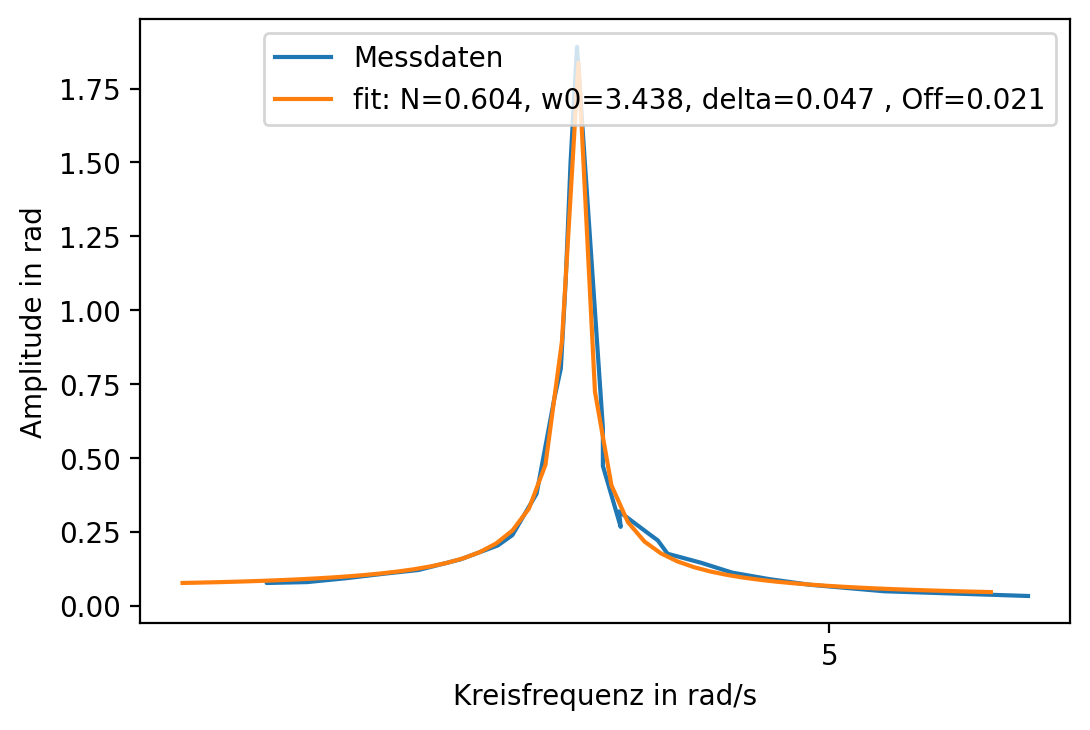

In [15]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
df=pd.read_csv("Pohlsches_Rad/ErzwungeneDrehschwingung_02_Gr27.csv",sep=';')
df1=df.dropna() #Dataframe without NaN

df1 = df1.replace(',','.', regex=True)
#df.iloc[:,0] = [float(str(i).replace(",", ".")) for i in df.iloc[:,0]]
#df.iloc[:,3] = [float(str(i).replace(",", ".")) for i in df.iloc[:,3]]
Spannung=df1.iloc[:,2].astype('float64').to_numpy()

Amplitude=df1.iloc[:,4].astype('float64').to_numpy()
#Bitte in der nächsten Zeile die Kreisfrequenzen eintragen.
Kreisfrequenz=np.array([1.52,1.52,1.77,2.01,2.24,2.46,2.72,2.95,3.04,3.19,3.30,3.34,3.37,3.40,3.44,3.60,3.60,3.71,3.70,3.90,3.94,4.00,4.21,4.40,4.63,4.88,5.34,6.23])

Amplitude=np.round(Amplitude,3)
plt.figure(dpi=200)
plt.plot(Kreisfrequenz,Amplitude,label='Messdaten')
plt.xlabel('Kreisfrequenz in rad/s')
plt.ylabel('Amplitude in rad')
plt.xticks(np.arange(0, 50, step=5))

#Estimating 
delta=0.05
N=12
Kreisfrequenz0=3.4
Off=-0.08

def Testfunktion(Kreisfrequenz,N,Kreisfrequenz0,delta,Off):
    return N/(np.sqrt((Kreisfrequenz0**2-Kreisfrequenz**2)**2 +4*delta**2*Kreisfrequenz**2))+Off
popt,pcov=curve_fit(Testfunktion,Kreisfrequenz,Amplitude,[N,Kreisfrequenz0,delta,Off])

print(popt)

#Bestimme das R^2=1-(Residual Sum of Squares)/(Total Sum of Squars). Das R^2 gibt an, wie gut der Fit bzw. unsere Funktion zu den Daten passt
residuals=Amplitude -Testfunktion(Kreisfrequenz,*popt) #Bestimme die Residuen, die Abweichung von der Amplitude zur Fitfunktion
Res_square=np.sum(residuals**2)#Quadrat der Residuen
ss_tot=np.sum((Amplitude -np.mean(Amplitude))**2)# Bestimmte die totale Quadratsumme
R2=1-Res_square/ss_tot #Bestimmte das R^2
print('Das Bestimmtheitsmass R^2 ist ={}'.format(R2))


#Ausgabe der Parameter mit Fehler in der Konsole
print('Die Fitparameter für das N=Drehmoment/Traegheitsmoment ist N = {} +- {}'.format(round(popt[0],2),round(np.sqrt(pcov[0][0]),2)))
print('Die Fitparameter für die Resonanzfrequenz ist w0 = {} +- {}'.format(round(popt[1],2),round(np.sqrt(pcov[1][1]),2)))
print('Die Fitparameter für die Dämpfung ist delta ={} +- {}'.format(round(popt[2],4),round(np.sqrt(pcov[2][2]),4)))
print('Die Fitparameter für den Offset der Amplitude ist Offset = {} +- {}'.format(round(popt[3],2),round(np.sqrt(pcov[3][3]),2)))

print('Das R^2 ist {}'.format(R2))  #Gebe das R^2 in der Konsole aus.





Kreisfrequenz=np.linspace(1,6,50)
plt.plot(Kreisfrequenz, Testfunktion(Kreisfrequenz,*popt),label='fit: N=%5.3f, w0=%5.3f, delta=%5.3f , Off=%5.3f' % tuple(popt))
plt.legend()



# Freie Drehschwingung

No handles with labels found to put in legend.


Die Fitparameter für die Amplitude ist A0 = 2.86 +- 0.03
Die Fitparameter für die Resonanzfrequenz ist w0 = 3.46 +- 0.001
Die Fitparameter für die Dämpfung ist delta =0.0849 +- 0.0012
Die Fitparameter für die Phasenverschiebung ist phi = 3.95 +- 0.01
Die Fitparameter für den Offset der Amplitude ist Offset = -0.43 +- 0.01
Das R^2 ist 0.9826881475209366


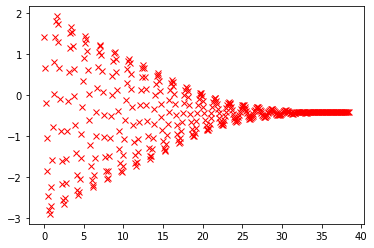

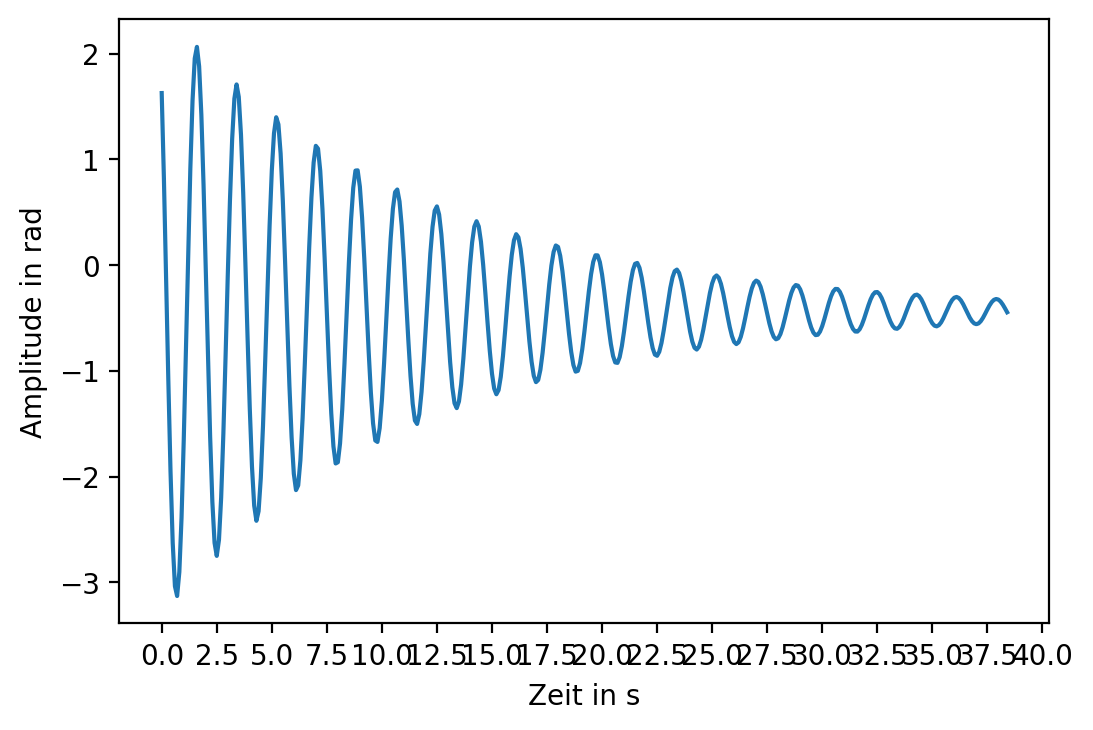

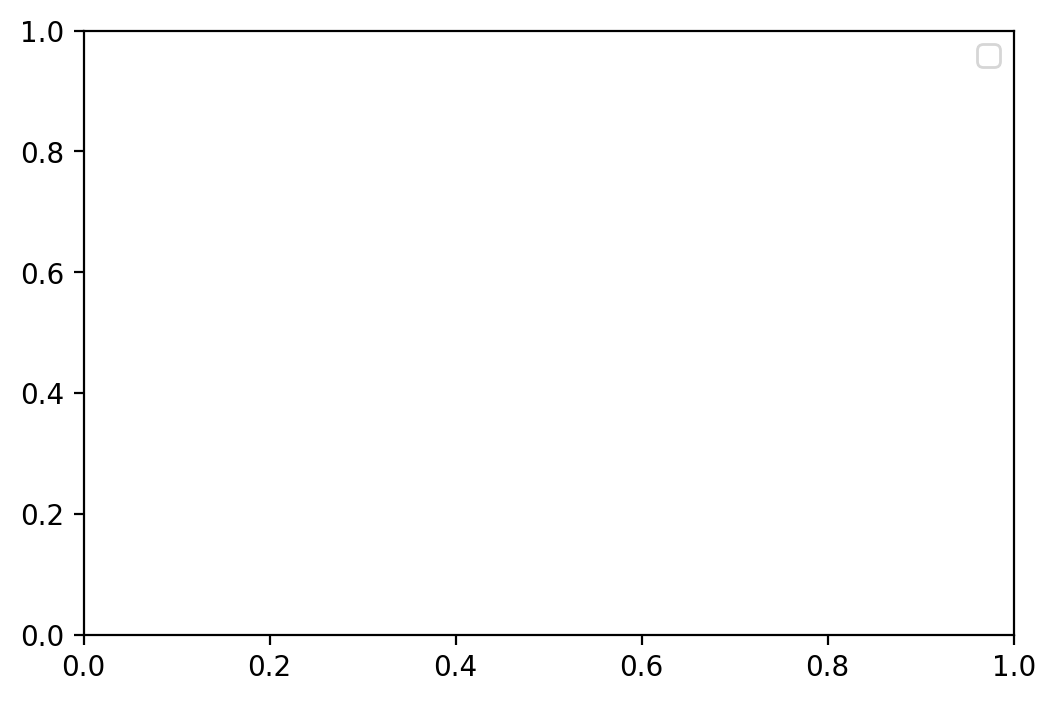

In [17]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""
#Importiere die benötigten Bibliotheken
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


df=pd.read_csv("Pohlsches_Rad/FreieDrehschwingung_02A_Gr27.csv",sep=';') #Datei einlesen (funktioniert auch mit.xslx , dann aber keinen Separator wählen), Separator für die Spalten wählen. Dieser muss in der .csv Datein identifiziert werden
df = df.replace(',','.', regex=True) #Ersetze alle , durch .   regex=True bedeutet, bei allen Spalten ersetzen
#df.iloc[:,0] = [float(str(i).replace(",", ".")) for i in df.iloc[:,0]]  #Separaator nur auf einzelne Spalten anwenden
#df.iloc[:,3] = [float(str(i).replace(",", ".")) for i in df.iloc[:,3]]
#df[] = df[].str.replace(',', '').astype(float) #- if ',' is the problem
Zeit=df.iloc[:,0].astype('float').to_numpy() #  Die Nullte Spalte einlesen und als Array im Format Fließkommazahl umformen. Dieser array ist hier die Zeit

Amplitude=df.iloc[:,3].astype('float').to_numpy() #Amplitude aus dritter Spalte einlesen

Amplitude=np.round(Amplitude,3) # Runde Amplitude auf drei Nachkommastellen

#Plotte die Daten Zeit gegen Amplitude mit Matplotlib
plt.plot(Zeit,Amplitude,'x',color='r', label='Messdaten')
plt.figure(dpi=200)
plt.xlabel('Zeit in s')
plt.ylabel('Amplitude in rad')
plt.xticks(np.arange(0, 50, step=2.5)) #Markiere auf der x-Achse nur ticks im Bereich 0 bis 50 mit Schrittweite 5

#Estimating: Schätze die Fit-Parameter ab
w=2*np.pi*0.5 #Kreisfrequenz
A0=2.3 #Amplitude
delta=0.015 #Dämpfung
phi=np.pi/2 #Phasenverschiebung
A_off=-0.28  #Ampltiudenoffset

#Definiere eine Testfunktion (Fitfunktion), welche an die Daten angepasst werden soll
def Testfunktion(Zeit,A0,w,delta,phi,A_off):
    return A0*np.sin(np.absolute(w)*Zeit-phi)*np.exp(-delta*Zeit)+A_off

#popt enthält alle Fitparameter und gibt diese nach der Reihenfolge in der Testfunktion aus
popt,pcov=curve_fit(Testfunktion,Zeit,Amplitude,[w,A0,delta,phi,A_off])  #Führe einen Fit nach der Least-square-method (Methode der kleinsten Quadrate durch). Ergänze die Startwerte, damit der Fit grob die Größenordnung der Parameter weiß. pcov beinhaltet die Kovarianzen, welche wir hier aber nicht benötigen.
#print(popt) #Gebe die Koeffizienten in der Konsole aus.

plt.plot(Zeit, Testfunktion(Zeit,*popt),label='fit: A0=%5.3f, w=%5.3f, delta=%5.3f , phi=%5.3f , A_off=%5.3f ' % tuple(popt)) #plotte die Zeit gegen die Fitfunktion. Das Label benötigen wir später für die Anzeige einer Legende im Graphen

plt.legend() #Stelle die Legende im Graphen dar

#Bestimme das R^2=1-(Residual Sum of Squares)/(Total Sum of Squars). Das R^2 gibt an, wie gut der Fit bzw. unsere Funktion zu den Daten passt
residuals=Amplitude -Testfunktion(Zeit,*popt) #Bestimme die Residuen, die Abweichung von der Amplitude zur Fitfunktion
Res_square=np.sum(residuals**2) #Quadrat der Residuen
ss_tot=np.sum((Amplitude -np.mean(Amplitude))**2) # Bestimmte die totale Quadratsumme
R2=1-Res_square/ss_tot #Bestimmte das R^2

#Ausgabe der Parameter mit Fehler in der Konsole
print('Die Fitparameter für die Amplitude ist A0 = {} +- {}'.format(round(popt[0],2),round(np.sqrt(pcov[0][0]),2)))
print('Die Fitparameter für die Resonanzfrequenz ist w0 = {} +- {}'.format(round(popt[1],3),round(np.sqrt(pcov[1][1]),3)))
print('Die Fitparameter für die Dämpfung ist delta ={} +- {}'.format(round(popt[2],4),round(np.sqrt(pcov[2][2]),4)))
print('Die Fitparameter für die Phasenverschiebung ist phi = {} +- {}'.format(round(popt[3],2),round(np.sqrt(pcov[3][3]),2)))
print('Die Fitparameter für den Offset der Amplitude ist Offset = {} +- {}'.format(round(popt[4],2),round(np.sqrt(pcov[4][4]),2)))

print('Das R^2 ist {}'.format(R2))  #Gebe das R^2 in der Konsole aus.